# analysis of pp-SRC c.m. momentum simulations

# imports

In [1]:
from notebook_tools import *
import ast ,matplotlib.patches as patches
%matplotlib inline

In [172]:
nominal_values=dict({'SigmaT_12C':0.167,'SigmaT_err_12C':0.006,
                     'SigmaX_12C':0.165,'SigmaX_err_12C':0.007,'SigmaY_12C':0.170,'SigmaY_err_12C':0.012,
                     'a1_12C':0.143,'a1_err_12C':0.075,'a2_12C':0.158,'a2_err_12C':0.009,
                     'b1_12C':0.562,'b1_err_12C':0.078,'b2_12C':0.159,'b2_err_12C':0.009,
                     'SigmaZa1_12C':0.143,'SigmaZa1_err_12C':0.075,'SigmaZa2_12C':0.158,'SigmaZa2_err_12C':0.009,
                     'MeanZa1_12C':0.562,'MeanZa1_err_12C':0.078,'MeanZa2_12C':0.159,'MeanZa2_err_12C':0.009})

# read data

In [28]:
# read all our runs results
sims_files = []
sims_list , sims_files = os.listdir('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/') , [] 
for file in sims_list:                                                                                        
    print 'adding ',file
    sims_files.append(pd.read_csv(('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/'+file)))

simsall=pd.concat(sims_files)
simsall.fillna(0.0,inplace=True)
print 'len:',len(simsall) 
sims=sims[(sims.run<1000000) | (sims.run>1100000)]
sims = sims[(sims.run>1000000) | (sims.run<100000)]

adding  runs1000000to1100000_20SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs1000000to1400000_results.csv
adding  runs10000to72500_results.csv
adding  runs1100000to1400000_30SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs1400000to1500000_results.csv
adding  runs1500000to1501000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1501000to1502000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1502000to1503000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1503000to1504000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1504000to1505000_NsigmaT_1_NSigmaZa1_1000_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1_NRand_10_simulationruns_results.csv
adding  runs1505000to1506000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_

In [32]:
# not really necessary
for target in ['12C']:
    simsall['PvalTotal_%s'%target] = Fisher_combination_Pvals_pandas([simsall['PvalSigmaX_unweighted_%s'%target],
                                                                   simsall['PvalSigmaY_unweighted_%s'%target],
                                                                   simsall['PvalSigmaZa1_unweighted_%s'%target],
                                                                   simsall['PvalSigmaZa2_unweighted_%s'%target], 
                                                                   simsall['PvalMeanZa1_unweighted_%s'%target],
                                                                   simsall['PvalMeanZa2_unweighted_%s'%target]         
                                                                  ])

    simsall['PvalTot_tw_%s'%target] = Fisher_combination_Pvals_pandas([simsall['PvalSigmaX_tw_%s'%target],
                                                                   simsall['PvalSigmaY_tw_%s'%target],
                                                                   simsall['PvalSigmaZa1_tw_%s'%target],
                                                                   simsall['PvalSigmaZa2_tw_%s'%target], 
                                                                   simsall['PvalMeanZa1_tw_%s'%target],
                                                                   simsall['PvalMeanZa2_tw_%s'%target]         
                                                                  ])




In [3]:
def draw_PvalWeighting_2d( df , v1 , v2 , bins=40 ,
                          weights=None, w_label=None , cmap='Greys' ,
                          xlabel=None , ylabel=None ,                         
                          figsize=(10,10), title=None, do_save_fig=False,
                          do_add_nominal_values=False, suffix='',      
                          nominal_v1=None,nominal_v1_err=None,                       
                          nominal_v2=None,nominal_v2_err=None,
                          x_ranges=None,y_ranges=None):
    
    fig,ax=plt.subplots(figsize=figsize)
    sum_weights = len(df)*np.average(df[v1],weights=weights)
    print 'sum_weights:',sum_weights
    plt.hist2d(df[v1],df[v2],bins=bins,weights=weights/sum_weights,cmap=cmap); # 0.01 offset to draw the plot nicely
    ax.add_patch( patches.Rectangle((np.min(df[v1]), np.min(df[v2])),
                                     np.max(df[v1])-np.min(df[v1]) ,
                                     np.max(df[v2])-np.min(df[v2]),        
                                     fill=True, linewidth=3 , color='green', alpha=0.1
                                    ))
    print 'min of ',v1,'is',np.min(df[v1])
    print 'max of ',v1,'is',np.max(df[v1])
    print 'min of ',v2,'is',np.min(df[v2])
    print 'max of ',v2,'is',np.max(df[v2])
    if y_ranges is None:
        ax.set_ylim(np.min(df[v2])-0.1*np.abs(np.min(df[v2])),np.max(df[v2])+0.1*np.abs(np.max(df[v2])))
    else: 
        ax.set_ylim(y_ranges)
    if x_ranges is None:
        ax.set_xlim(np.min(df[v1])-0.1*np.abs(np.min(df[v1])),np.max(df[v1])+0.1*np.abs(np.max(df[v1])))
    else: 
        ax.set_xlim(x_ranges)


    cb=plt.colorbar()
    cb.ax.tick_params(labelsize=30)
    set_axes( ax , xlabel , ylabel , fontsize=40)
    if do_add_nominal_values:
           
        ax.add_patch( patches.Rectangle((nominal_v1-nominal_v1_err, nominal_v2-nominal_v2_err),
                                        2*nominal_v1_err,
                                        2*nominal_v2_err,        
                                        fill=False, linewidth=3 , color='blue'
                                       ))

    if do_save_fig: 
        plt.savefig('/Users/erezcohen/Desktop/DataMining/AccCorr_ppSRCAnalysisNote/all_figures/AccCorr_'+v1+'_'+v2+'_'+w_label+suffix+'.pdf')
    



In [4]:
def draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2' ,
                              xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                              bins=40,
                              figsize=(10,10),
                              weights=None,
                              w_labels=None,
                              do_save_fig=False,
                              draw_generated=False,
                              do_add_nominal_values=False, 
                              nominal_v1=None,nominal_v1_err=None,                                                            
                              nominal_v2=None,nominal_v2_err=None,
                              do_draw=None,suffix='',
                              x_ranges=None,y_ranges=None):
    
    for weight,w_label,do_showplot in zip(weights,w_labels,do_draw):
        
        if weight is None:
            if draw_generated and do_showplot:
                draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight, w_label=w_label  , cmap='hot_r' ,
                                  xlabel=xlabel,ylabel=ylabel, figsize=figsize , title='no weighting' , do_save_fig=do_save_fig);
        elif do_showplot:
            print 'ploting histogram weighted by',weight
            title=weight
            weight=sims[weight]
            draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight, w_label=w_label  , cmap='hot_r' ,
                                  xlabel=xlabel,ylabel=ylabel, figsize=figsize , title=title , do_save_fig=do_save_fig,
                                  do_add_nominal_values=do_add_nominal_values,
                                  nominal_v1=nominal_v1,
                                  nominal_v1_err=nominal_v1_err,
                                  nominal_v2=nominal_v2,
                                  nominal_v2_err=nominal_v2_err,
                                  suffix=suffix,x_ranges=x_ranges,y_ranges=y_ranges);



In [14]:
def plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]',binsy=30,
                                      v1='SigmaX',xlabel='$\\sigma_{x}$ [Gev/c]', binsx=30,
                                      target='12C',do_save_fig=False,
                                      do_add_nominal_values=False,
                                      nominal_v1=None,nominal_v1_err=None,
                                      nominal_v2=None,nominal_v2_err=None,
                                      do_draw=None,suffix='',                             
                                      x_ranges=None,y_ranges=None): 
    
    weights = [None , 'PvalSigmaT%s_%s'%(v2,target) , 'PvalTotal_unweighted_%s'%target, 'Pvaltot_pandas_%s'%target, 'PvalTotal_%s'%target  ]
    w_labels = ['NoWeights','PvalSigmaT%s_%s'%(v2,target),'PvalTotal_%s'%target,'Pvaltot_pandas_%s'%target ,'PvalTotal_%s'%target]
    
    draw_all_PvalWeighting_2d(v1=v1 , v2=v2 ,
                              xlabel=xlabel,ylabel=ylabel ,
                              bins=(binsx,binsy),
                              figsize=(15,10),
                              weights=weights, 
                              w_labels=w_labels,
                              do_add_nominal_values=do_add_nominal_values,
                              do_save_fig=do_save_fig,
                              nominal_v1=nominal_v1,
                              nominal_v1_err=nominal_v1_err,
                              nominal_v2=nominal_v2,
                              nominal_v2_err=nominal_v2_err,
                              do_draw=do_draw,
                              suffix=suffix,x_ranges=x_ranges,y_ranges=y_ranges)



ploting histogram weighted by PvalSigmaTSigmaZa1_12C
sum_weights: 146628.009399
min of  genSigmaX is 0.047097
max of  genSigmaX is 0.347
min of  genSigmaZa1 is -0.398402
max of  genSigmaZa1 is 1.1984
ploting histogram weighted by PvalSigmaTSigmaZa2_12C
sum_weights: 146439.438368
min of  genSigmaX is 0.047097
max of  genSigmaX is 0.347
min of  genSigmaZa2 is -0.598901
max of  genSigmaZa2 is 0.498901
ploting histogram weighted by PvalSigmaTMeanZa1_12C
sum_weights: 145367.395758
min of  genSigmaX is 0.047097
max of  genSigmaX is 0.347
min of  genMeanZa1 is -0.098402
max of  genMeanZa1 is 1.4984
ploting histogram weighted by PvalSigmaTMeanZa2_12C
sum_weights: 146161.63036
min of  genSigmaX is 0.047097
max of  genSigmaX is 0.347
min of  genMeanZa2 is -0.357
max of  genMeanZa2 is 0.598202


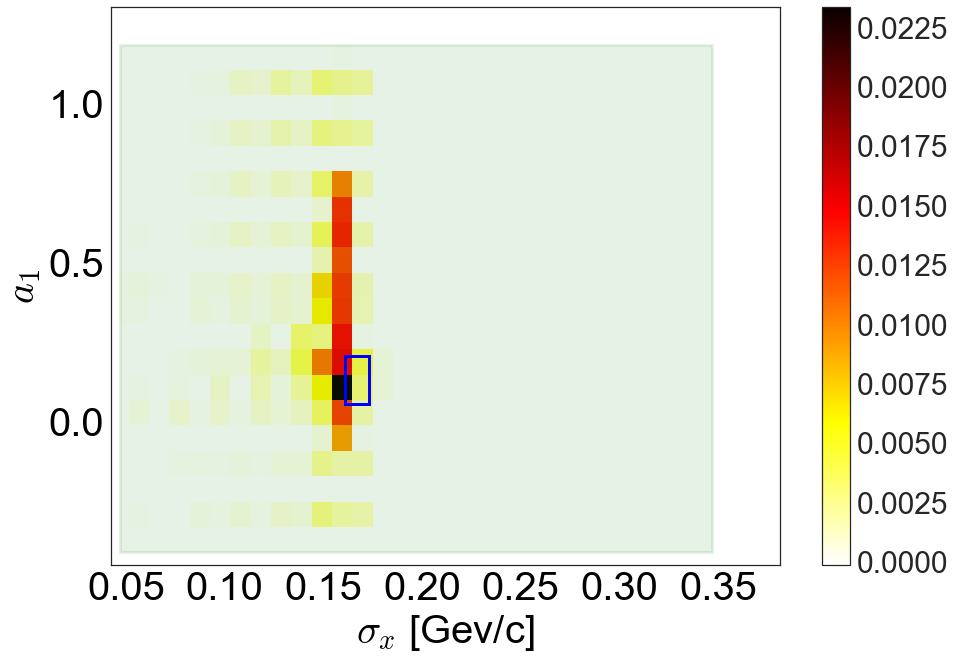

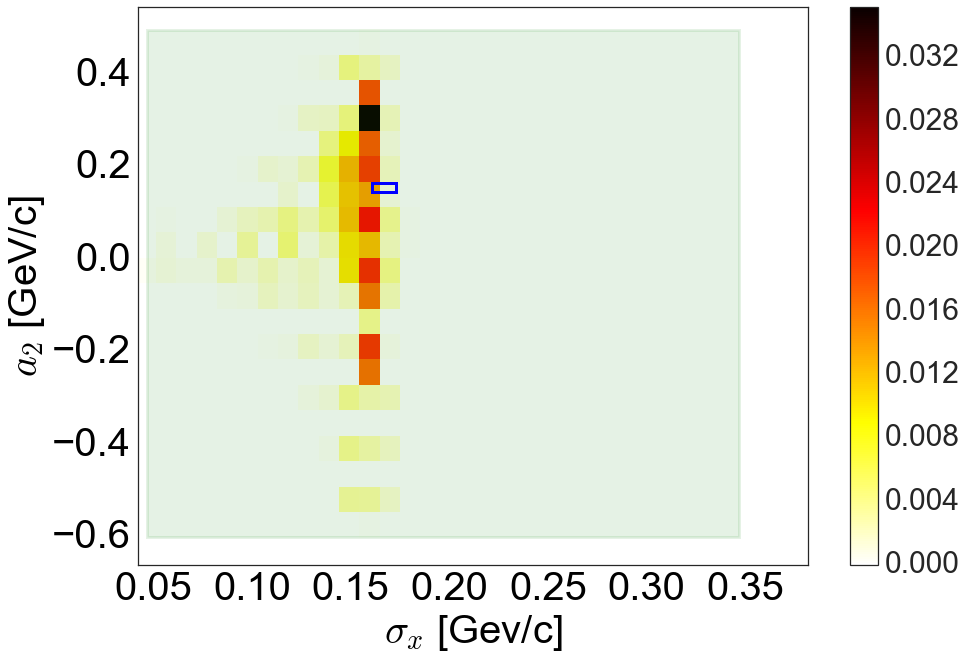

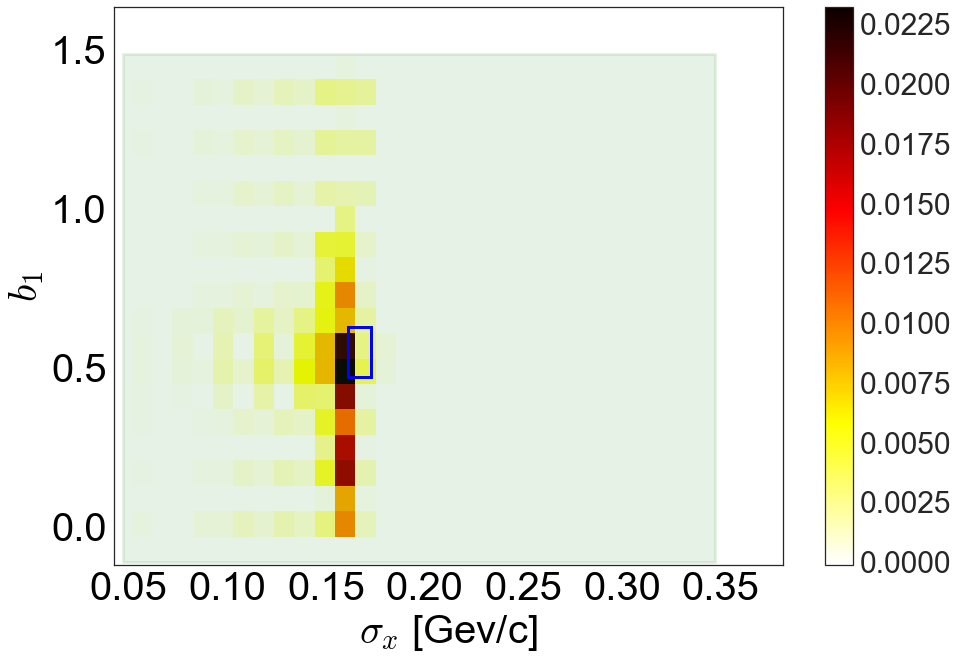

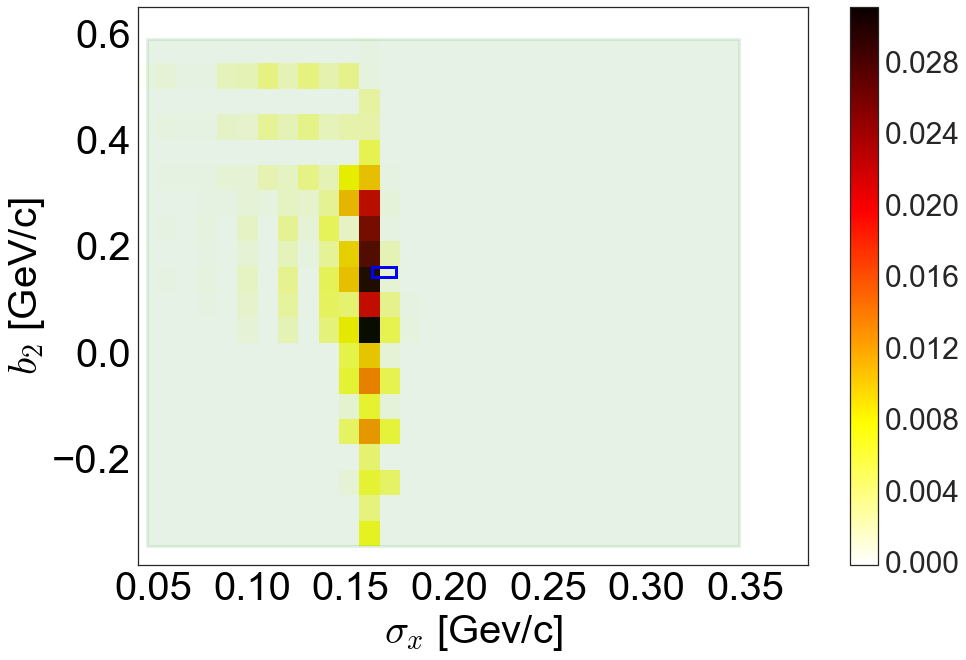

In [40]:
do_save_fig=True
do_add_nominal_values=True
target='C12'
do_draw = [False , True , False , False , False ]
binsx=np.linspace(0,0.36,36)#np.linspace(0.04,0.26,31)
binsy=20
plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$a_{1}$',
                                  nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
                                  nominal_v2=nominal_values['a1_%s'%target],nominal_v2_err=nominal_values['a1_err_%s'%target],
                                  do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
                                  do_draw=do_draw)
plot_SigmaT_correlationWithOthers(v2='SigmaZa2',ylabel='$a_{2}$ [GeV/c]',          
                                  nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
                                  nominal_v2=nominal_values['a2_%s'%target],nominal_v2_err=nominal_values['a2_err_%s'%target],
                                  do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
                                  do_draw=do_draw)
plot_SigmaT_correlationWithOthers(v2='MeanZa1',ylabel='$b_{1}$',
                                  nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
                                  nominal_v2=nominal_values['b1_%s'%target],nominal_v2_err=nominal_values['b1_err_%s'%target],
                                  do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
                                  do_draw=do_draw)
plot_SigmaT_correlationWithOthers(v2='MeanZa2',ylabel='$b_{2}$ [GeV/c]',
                                  nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
                                  nominal_v2=nominal_values['b2_%s'%target],nominal_v2_err=nominal_values['b2_err_%s'%target],
                                  do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
                                  do_draw=do_draw)

In [5]:
sims=pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs10000to72500_results.csv')

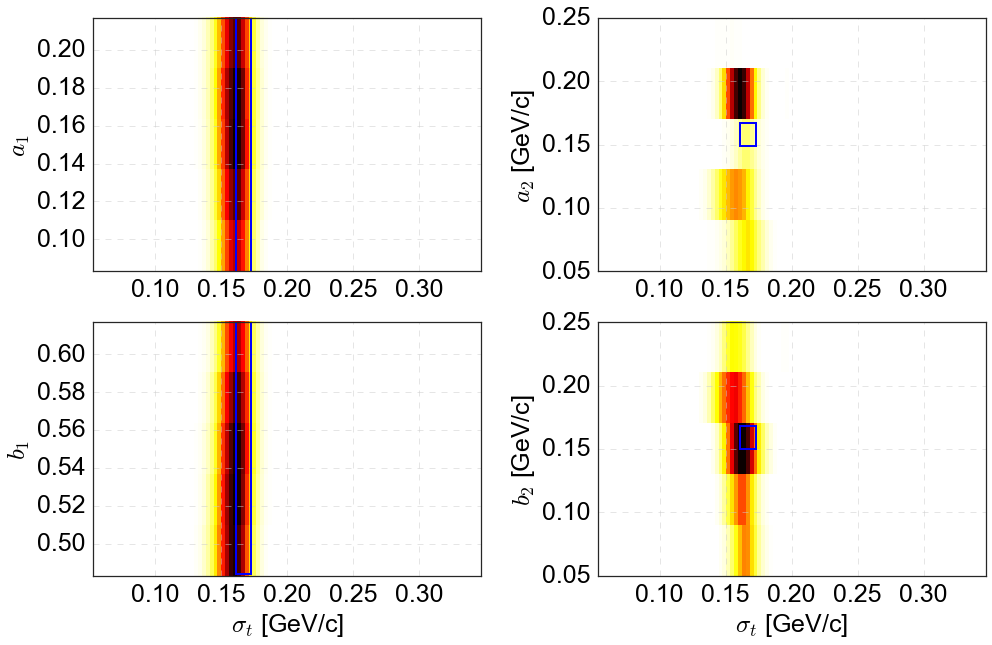

In [70]:
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(2,2,1)
plot_2d_hist(sims.genSigmaX,sims.genSigmaZa1,bins=(100,5),
             xlabel='',ylabel='$a_1$', norm='non',
             weights=sims.PvalTotal_unweighted_12C,ax=ax);
add_nominal_values('SigmaT','a1')
ax.grid(linestyle='--',alpha=0.5)

ax=fig.add_subplot(2,2,2)
plot_2d_hist(sims.genSigmaX,sims.genSigmaZa2,bins=(100,5),
             xlabel='',ylabel='$a_2$ [GeV/c]', norm='non',
             weights=sims.PvalTotal_unweighted_12C,ax=ax);
add_nominal_values('SigmaT','a2')
ax.grid(linestyle='--',alpha=0.5)

ax=fig.add_subplot(2,2,3)
plot_2d_hist(sims.genSigmaX,sims.genMeanZa1,bins=(100,5),
             xlabel='$\\sigma_t$ [GeV/c]',ylabel='$b_1$', norm='non',
             weights=sims.PvalTotal_unweighted_12C,ax=ax);
add_nominal_values('SigmaT','b1')
ax.grid(linestyle='--',alpha=0.5)

ax=fig.add_subplot(2,2,4)
plot_2d_hist(sims.genSigmaX,sims.genMeanZa2,bins=(100,5),
             xlabel='$\\sigma_t$ [GeV/c]',ylabel='$b_2$ [GeV/c]', norm='non',
             weights=sims.PvalTotal_unweighted_12C,ax=ax);
add_nominal_values('SigmaT','b2')
ax.grid(linestyle='--',alpha=0.5)
plt.subplots_adjust(wspace=0.3)

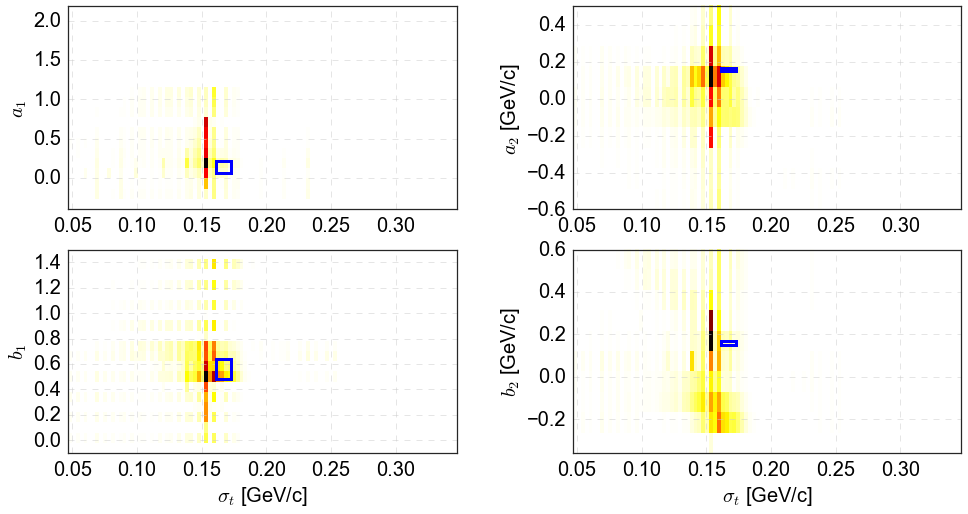

In [66]:

fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(2,2,1)

plot_2d_hist(simsall.genSigmaX,simsall.genSigmaZa1,weights=simsall.PvalSigmaTSigmaZa1_12C,
             bins=(100,20),norm='non',fontsize=20,
             xlabel='',ylabel='$a_1$',
             ax=ax);
add_nominal_values('SigmaT','a1')
ax.grid(linestyle='--',alpha=0.5)

ax=fig.add_subplot(2,2,2)
plot_2d_hist(simsall.genSigmaX,simsall.genSigmaZa2,bins=(100,10),
             xlabel='',ylabel='$a_2$ [GeV/c]',norm='non',fontsize=20,
             weights=simsall.PvalTotal_unweighted_12C,ax=ax);
add_nominal_values('SigmaT','a2')
ax.grid(linestyle='--',alpha=0.5)

ax=fig.add_subplot(2,2,3)
plot_2d_hist(simsall.genSigmaX,simsall.genMeanZa1,bins=(100,20),
             xlabel='$\\sigma_t$ [GeV/c]',ylabel='$b_1$',norm='non',fontsize=20,
             weights=simsall.PvalTotal_unweighted_12C,ax=ax);
add_nominal_values('SigmaT','b1')
ax.grid(linestyle='--',alpha=0.5)

ax=fig.add_subplot(2,2,4)
plot_2d_hist(simsall.genSigmaX,simsall.genMeanZa2,bins=(100,10),
             xlabel='$\\sigma_t$ [GeV/c]',ylabel='$b_2$ [GeV/c]',norm='non',fontsize=20,
             weights=simsall.PvalTotal_unweighted_12C,ax=ax);
add_nominal_values('SigmaT','b2')
ax.grid(linestyle='--',alpha=0.5)
plt.subplots_adjust(wspace=0.3)

In [69]:
def add_nominal_values(v1='SigmaT',v2='a1',target='C12',linewidth=2):
    nominal_v1 , nominal_v1_err = nominal_values[v1+'_%s'%target],nominal_values[v1+'_err_%s'%target],
    nominal_v2 , nominal_v2_err = nominal_values[v2+'_%s'%target],nominal_values[v2+'_err_%s'%target],
    ax.add_patch( patches.Rectangle((nominal_v1-nominal_v1_err, nominal_v2-nominal_v2_err),    
                                    2*nominal_v1_err, 2*nominal_v2_err,  fill=False, linewidth=linewidth , color='blue'))

   

In [192]:
def draw_PvalWeighting(sims=None,
                       var='SigmaX', xlabel='',bins=50,target='12C',name='$^{12}C$',
                       PvalTotWeight=None,legend_loc=None,                       
                       x_range = None, y_range = None,                       
                       x_text = 0.1 , y_text=None,                       
                       figsize=(10,10),                       
                       fontsize=20,
                       weight_defs=None,
                       weighting_labels=None,ax=None):
        

    
    print '--------------\n\t',target,'\n--------------'

    
    h_weights , h_weighting_labels = [] , []
    for weight_def,weighting_label in zip(weight_defs,weighting_labels):
        weight = sims[weight_def]
        if np.sum(weight)>0:            
            h_weights.append(weight)
            h_weighting_labels.append(weighting_label)
            mu = np.average(sims['gen'+var] , weights=weight)
            variance = np.average((sims['gen'+var]-mu)**2, weights=weight)
            sigma = np.sqrt(variance)                                                                           
            print weighting_label + ': %.3f \pm %.3f'%(mu,sigma)
        else:
            print weighting_label + ' weights sum up to 0'
        if 'Pval(tot)' in weighting_label:
            mu_PvalTot,sigma_PvalTot = mu,sigma
            
    if ax is None:
        fig,ax=plt.subplots(figsize=(10,10))
        
    plt.hist(sims['gen'+var],label='generated',  bins=bins,normed=1, histtype='step',linewidth=2);
    for weight,weighting_label in zip(h_weights,h_weighting_labels):

        h,bins,_ = plt.hist(sims['gen'+var],
                            weights=weight,
                            label=weighting_label,                
                            bins=bins,
                            normed=1,
                            histtype='step',linewidth=2);
        if 0.7*np.max(h)>y_text: y_text=0.7*np.max(h) 
    set_axes(ax,x_label=xlabel,y_label='',fontsize=fontsize)
    ax.yaxis.set_major_formatter( NullFormatter() )
    if legend_loc is not None:
        plt.legend(fontsize=fontsize,loc=legend_loc)    
    ax.set_title('$%.3f \pm %.3f$'%(mu_PvalTot,sigma_PvalTot),y=1.02,fontsize=20)
    ax.set_xlim(x_range)
#     plt.text(x_text,y_text,name,fontsize=40)

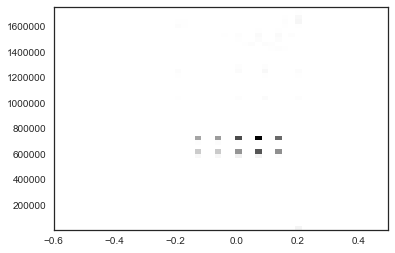

In [154]:
# plt.hist2d(simsrreduced.genSigmaZa1,simsrreduced.run,bins=50);
plt.hist2d(simsall.genSigmaZa2,simsall.run,weights=simsall.PvalTotal_12C,bins=50);



--------------
	12C 
--------------
weighted by $Pval(tot)$: 0.162 \pm 0.044
--------------
	12C 
--------------
weighted by $Pval(tot)$: 0.198 \pm 0.010
--------------
	12C 
--------------
weighted by $Pval(tot)$: 0.540 \pm 0.046
--------------
	12C 
--------------
weighted by $Pval(tot)$: 0.249 \pm 0.008


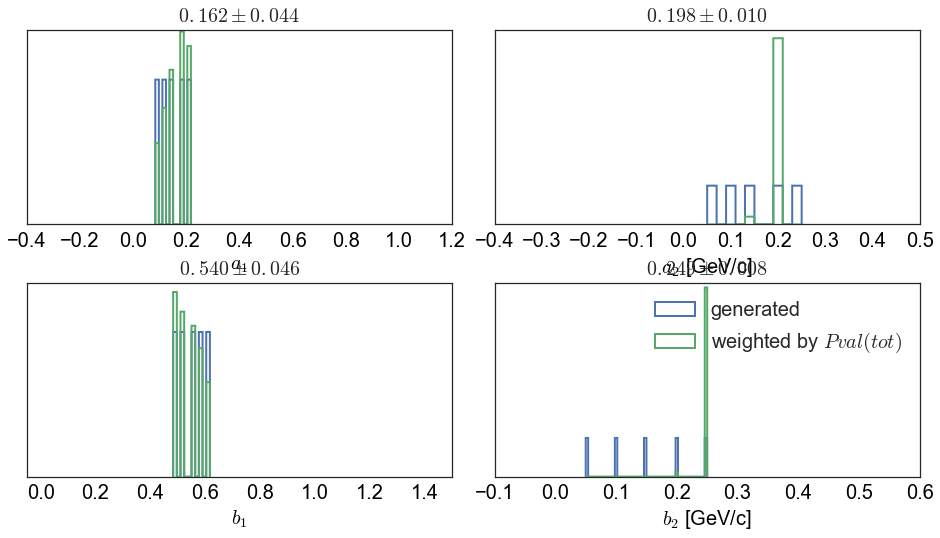

In [215]:
# simsreduced = simsall[(simsall.run>1000000) & (simsall.run<1400000)]
for target,name in zip(['12C']#,'27Al','56Fe','208Pb']
                       ,['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']
                      ):
    weight_defs=[ 'PvalTotal_'+target ]
    weighting_labels = ['weighted by $Pval(tot)$']

    fig=plt.figure(figsize=(16,8))
    ax=fig.add_subplot(2,2,1)

    draw_PvalWeighting(sims=sims,var='SigmaZa1',xlabel='$a_{1}$',
                       bins=10,
                       x_range=(-0.4,1.2),
                       target=target,name=name,
                       weight_defs=weight_defs,

                       weighting_labels=weighting_labels,ax=ax)

    ax=fig.add_subplot(2,2,2)

    draw_PvalWeighting(sims=sims,var='SigmaZa2',xlabel='$a_{2}$ [GeV/c]',
                       bins=10,
                       x_range=(-0.4,0.5),
                       target=target,name=name,
                       weight_defs=weight_defs,

                       weighting_labels=weighting_labels,ax=ax)
    
    ax=fig.add_subplot(2,2,3)

    draw_PvalWeighting(sims=sims,var='MeanZa1',xlabel='$b_{1}$',
                       bins=10,
                       x_range=(-0.05,1.5),
                       target=target,name=name,
                       weight_defs=weight_defs,

                       weighting_labels=weighting_labels,ax=ax)
   
    ax=fig.add_subplot(2,2,4)

    draw_PvalWeighting(sims=sims,var='MeanZa2',xlabel='$b_{2}$ [GeV/c]',
#                        bins=np.linspace(-0.6,0.6,10),
                       x_range=(-0.1,0.6),
                       target=target,name=name,
                       weight_defs=weight_defs,
                       legend_loc='upper right',
                       weighting_labels=weighting_labels,ax=ax)


    
    plt.subplots_adjust(hspace=0.3,wspace=0.1)
    
    
    
    
    

# reanalysis

In [210]:
# reacalculate Pval for all runs
# for i,row in simsall.iterrows():
#     if i%5000==0: print '[%.0f]'%(100.*float(i)/len(simsall))+'%'
#     for target in ['12C','27Al','56Fe','208Pb']:
#         for var in ['SigmaX','SigmaY','SigmaZa1','SigmaZa2','MeanZa1','MeanZa2']:
#             row['Pval'+var+'_unweighted_%s'%target] = Pval2varsAssumeGausDist( nominal_values[var+'_'+target] , nominal_values[var+'_err_'+target] , row['rec'+var+'_unweighted'] , 0 )
                                  
Nmax=50000
for i,row in simsall[10000:Nmax].iterrows():
    if i%5000==0: print '%.0f'%(100.*float(i)/len(simsall[0:Nmax]))+'%'
    for target in ['12C']:
        row['PvalTotal_%s'%target] = Fisher_combination_Pvals_pandas([Pval2varsAssumeGausDist_pandas(nominal_values['SigmaX_'+target] , 
                                                                                                     nominal_values['SigmaX_err_'+target] ,
                                                                                                     row['recSigmaX_unweighted'] , 0 ),

                                                                      Pval2varsAssumeGausDist_pandas(nominal_values['SigmaY_'+target] , 
                                                                                                     nominal_values['SigmaY_err_'+target] ,
                                                                                                     row['recSigmaY_unweighted'] , 0 ),

                                                                      Pval2varsAssumeGausDist_pandas(nominal_values['SigmaZa1_'+target] , 
                                                                                                     nominal_values['SigmaZa1_err_'+target] ,
                                                                                                     row['recSigmaZa1_unweighted'] , 0 ),

                                                                      Pval2varsAssumeGausDist_pandas(nominal_values['SigmaZa2_'+target] , 
                                                                                                     nominal_values['SigmaZa2_err_'+target] ,
                                                                                                     row['recSigmaZa2_unweighted'] , 0 ),

                                                                      Pval2varsAssumeGausDist_pandas(nominal_values['MeanZa1_'+target] , 
                                                                                                     nominal_values['MeanZa1_err_'+target] ,
                                                                                                     row['recMeanZa1_unweighted'] , 0 ),

                                                                      Pval2varsAssumeGausDist_pandas(nominal_values['MeanZa2_'+target] , 
                                                                                                     nominal_values['MeanZa2_err_'+target] ,
                                                                                                     row['recMeanZa2_unweighted'] , 0 )
                                                                  ])


20%
22%
24%
26%
28%
30%
32%
34%
36%
38%
40%
42%
44%
46%
48%
50%
52%
54%
56%
58%
60%
62%
64%
66%
68%
70%
72%
74%
76%
78%
80%
82%
84%
86%
88%
90%
92%
94%
96%
98%


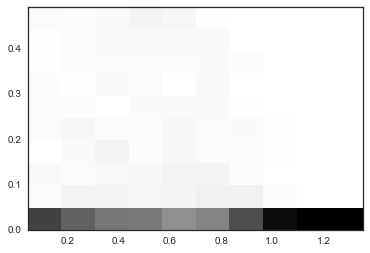

In [185]:
plt.hist2d(simsall[0:1000].genMeanZa1,simsall[0:1000].PvalMeanZa1_unweighted_12C);

In [205]:
def Pval2varsAssumeGausDist_pandas( v1 , v1Err , v2 , v2Err , debug=0 , name=''):
#     xmin , xmax = v2-v2Err , infty
    high_integral , integral_err = GaussianIntegral( v2-v2Err , infty , args=(v1,v1Err) )
    low_integral , integral_err = GaussianIntegral( -infty , v2+v2Err , args=(v1,v1Err) )
    return high_integral+low_integral



